---
## **Opdracht: Analyseren van CO2-uitstoot per Land**

**Context**: In deze opdracht ga je een dataset over **CO2-uitstoot per land per jaar** analyseren. Je zult leren hoe je gegevens kunt laden, verkennen, analyseren en visualiseren met behulp van de Python-bibliotheken **pandas**, **NumPy** en **Matplotlib**.

---

### **Opdrachtbeschrijving:**

Je werkt met een dataset genaamd `CO2_emissions.csv`, die informatie bevat over de jaarlijkse **CO2-uitstoot per land**. Door deze gegevens te analyseren, kun je belangrijke trends ontdekken, zoals de landen die het meeste CO2 uitstoten en hoe uitstoot is veranderd door de jaren heen.

Je gaat aan de slag met enkele belangrijke analyse- en visualisatieconcepten en volgt de stappen om tot inzichten te komen. De opdracht duurt ongeveer 45 minuten en introduceert je de principes van data-analyse en visualisatie.

---

### **Doelen van de Opdracht:**

1. **Analyseren** van de CO2-uitstootgegevens met behulp van **NumPy** en **pandas**.
2. **Visualiseren** van de belangrijkste bevindingen met behulp van **Matplotlib**.
3. **Inzicht krijgen** in de wereldwijde CO2-uitstoot en verschillen tussen landen ontdekken.

---

### **Dataset:**
- **Bestandsnaam**: `CO2_emissions.csv`
- **Kolommen** in de dataset:
  - **Land**: De naam van het land.
  - **Jaar**: Het jaar waarop de CO2-uitstoot gemeten werd.
  - **CO2-uitstoot (tonnen)**: De hoeveelheid CO2-uitstoot per land in tonnen.

---

### **Stapsgewijze Instructies:**

#### **Stap 1: Laad en Verken de Dataset**

1. Importeer de benodigde bibliotheken: **pandas**, **NumPy** en **Matplotlib**.
2. Laad de dataset `CO2_emissions.csv` in met behulp van **pandas**.
3. Bekijk de eerste paar rijen van de dataset om de structuur van de gegevens te begrijpen.

In [36]:
# Schrijf hier je code:
# 1 Importeer de benodigde libraries, pandas, numpy en matplotlib
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

# 2 Laad de csv dataset in een pandas DataFrame
csv = pd.read_csv("CO2_uitstoot.csv")

# 3 Bekijk de eerste paar rijen van de dataset
csv.head()

,Land,Jaar,CO2-uitstoot (tonnen)
0,Nederland,2018,163000000
1,Nederland,2017,164000000
2,Nederland,2016,165000000
3,Nederland,2015,167000000
4,Nederland,2010,180000000
5,Nederland,2005,190000000
6,Nederland,2000,200000000
7,Duitsland,2018,750000000
8,Duitsland,2017,760000000
9,Duitsland,2016,770000000



---

#### **Stap 2: Analyseer de Gegevens**

Beantwoord de volgende vragen door de gegevens te manipuleren met **pandas** en **NumPy**.

1. **Toon de top 5 landen met de hoogste CO2-uitstoot in het jaar 2018**.
   - Gebruik de functie `nlargest()` om de 5 grootste uitstoters te vinden.
   - Bereken welk percentage deze landen samen bijdragen aan de totale wereldwijde uitstoot.


In [35]:
# Schrijf hier je code
# 1 Filter de gegevens voor het jaar 2018
jaar_2018 = csv[csv["Jaar"] == 2018]
jaar_2018
# 2 Vind de top 5 landen met de hoogste uitstoot in 2018 (.nlargest())
jaar_2018_grootste = jaar_2018.nlargest(columns="CO2-uitstoot (tonnen)", n=5)


# 2 Bereken het totale percentage dat deze landen bijdragen (top5_uitstoot_2018 / totaal_uitstoot_2018 * 100)
sum = jaar_2018["CO2-uitstoot (tonnen)"].sum()
jaar_2018_grootste["percentages"] = (jaar_2018_grootste["CO2-uitstoot (tonnen)"] / sum)*100
jaar_2018_grootste[["Land","percentages"]]


,Land,Jaar,CO2-uitstoot (tonnen)
0,Nederland,2018,163000000
7,Duitsland,2018,750000000
14,Verenigde Staten,2018,5100000000
21,India,2018,2600000000
28,China,2018,10200000000
35,Japan,2018,1200000000
42,Frankrijk,2018,320000000
49,Brazilië,2018,500000000
56,Rusland,2018,1800000000
63,Canada,2018,550000000


2. **Welke landen hebben de grootste procentuele afname in CO2-uitstoot laten zien van 2000 naar 2018?**
   - Bereken de procentuele krimp voor elk land en toon de top 5 landen met de grootste afname.

In [87]:
# Schrijf hier je code 
# 1 Filter gegevens voor 1998 en 2018
df_2000 = csv[csv["Jaar"] == 2000]
df_2018 = csv[csv["Jaar"] == 2018]

# 2 Bereken de procentuele afname in CO2-uitstoot per land (((uitstoot_2018 - uitstoot_2000) / uitstoot_2000) * 100)
df_2000 = df_2000.set_index('Land')  # Rijen indexeren op 'Land'
df_2018 = df_2018.set_index('Land')  # Rijen indexeren op 'Land'
procentueel = ((df_2018["CO2-uitstoot (tonnen)"] - df_2000["CO2-uitstoot (tonnen)"]) /  df_2000["CO2-uitstoot (tonnen)"]) * 100
top5_afname = procentueel.sort_values().head()
top5_afname

Land
Nederland           -18.500000
Duitsland           -11.764706
Verenigde Staten    -17.741935
India               116.666667
China               104.000000
Japan                -7.692308
Frankrijk           -20.000000
Brazilië             25.000000
Rusland             -18.181818
Canada              -15.384615
Australië           -14.000000
Zuid-Afrika          20.000000
Mexico              -11.764706
Italië              -18.367347
Spanje              -23.076923
Zwitserland         -13.043478
Name: CO2-uitstoot (tonnen), dtype: float64


3. **Welke landen hebben hun CO2-uitstoot sinds 2000 zien groeien?**
   - Vergelijk de uitstoot in het jaar 2000 met die in 2018 en toon de landen waar de uitstoot is gestegen.

In [60]:
# Schrijf hier je code
# Filter gegevens voor 2000

# Vind de landen waarvan hun uitstoot is gegroeid tussen 2000 en 2018
procentueel.sort_values(ascending=False).head()

Land
India          116.666667
China          104.000000
Brazilië        25.000000
Zuid-Afrika     20.000000
Japan           -7.692308
Name: CO2-uitstoot (tonnen), dtype: float64

#### **Stap 3: Visualiseer de Bevindingen**

Maak de volgende visualisaties om inzicht te krijgen in de belangrijkste bevindingen.

1. **Staafdiagram** van de top 10 landen met de hoogste CO2-uitstoot in 2018.

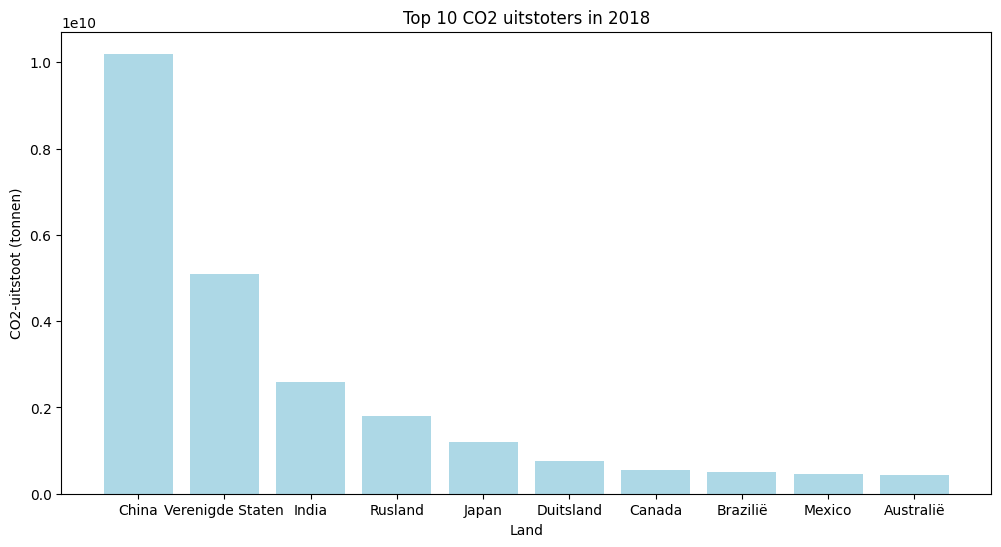

In [73]:
# schrijf hier je code
# Staafdiagram voor de top 10 uitstoters in 2018
df_2018 = csv[csv["Jaar"] == 2018]
top_10_2018 = df_2018.sort_values(by='CO2-uitstoot (tonnen)', ascending=False).head(10)

# Maak de diagram wat groter, zodat de x-as leesbaar is
plt.figure(figsize=(12, 6))

plt.bar(top_10_2018["Land"], top_10_2018["CO2-uitstoot (tonnen)"], color='lightblue')
plt.title('Top 10 CO2 uitstoters in 2018')
plt.xlabel('Land')
plt.ylabel('CO2-uitstoot (tonnen)')
plt.show()


2. **Scatter plot** van de procentuele toename in CO2-uitstoot tussen 2000 en 2018 voor alle landen.

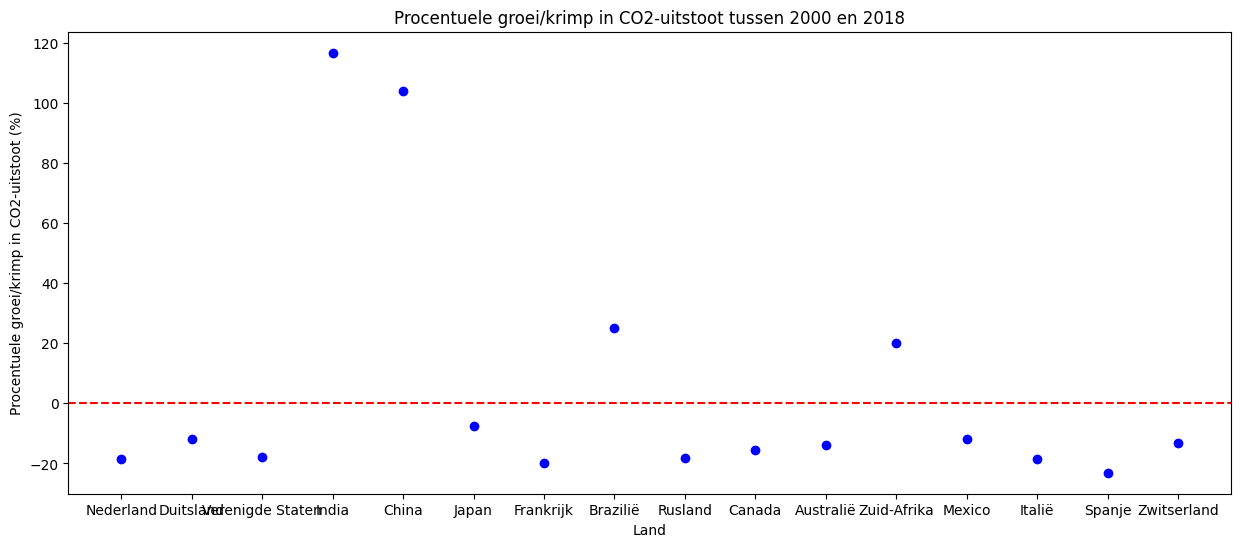

In [96]:
# Schrijf hier je code
# Scatter plot voor procentuele groei in uitstoot tussen 2000 en 2018
df_2000 = csv[csv["Jaar"] == 2000]
df_2018 = csv[csv["Jaar"] == 2018]

# Zet de "Land" kolom als index, om de volgorde te bewaren
df_2000 = df_2000.set_index('Land')  
df_2018 = df_2018.set_index('Land') 
procentueel = ((df_2018["CO2-uitstoot (tonnen)"] - df_2000["CO2-uitstoot (tonnen)"]) /  df_2000["CO2-uitstoot (tonnen)"]) * 100
procentueel

# Pas het formaat van de figuur aan, om de assen leesbaarder te maken
plt.figure(figsize=(15, 6))

# Maak de scatter plot met x-as als 'Land' en y-as als 'procentuele_krimp'
# De "landen" zijn nu geen kolom meer, maar de index. Je spreekt ze daarom aan met .index
plt.scatter(df_2018.index, procentueel, color='blue')

plt.xlabel('Land')
plt.ylabel('Procentuele groei/krimp in CO2-uitstoot (%)')
plt.title('Procentuele groei/krimp in CO2-uitstoot tussen 2000 en 2018')

# Optioneel: voeg horizontale lijn toe bij 0% verandering
plt.axhline(0, color='red', linestyle='--')



3. **Lijnplot** van de evolutie van CO2-uitstoot door de jaren heen voor de top 3 uitstotende landen.

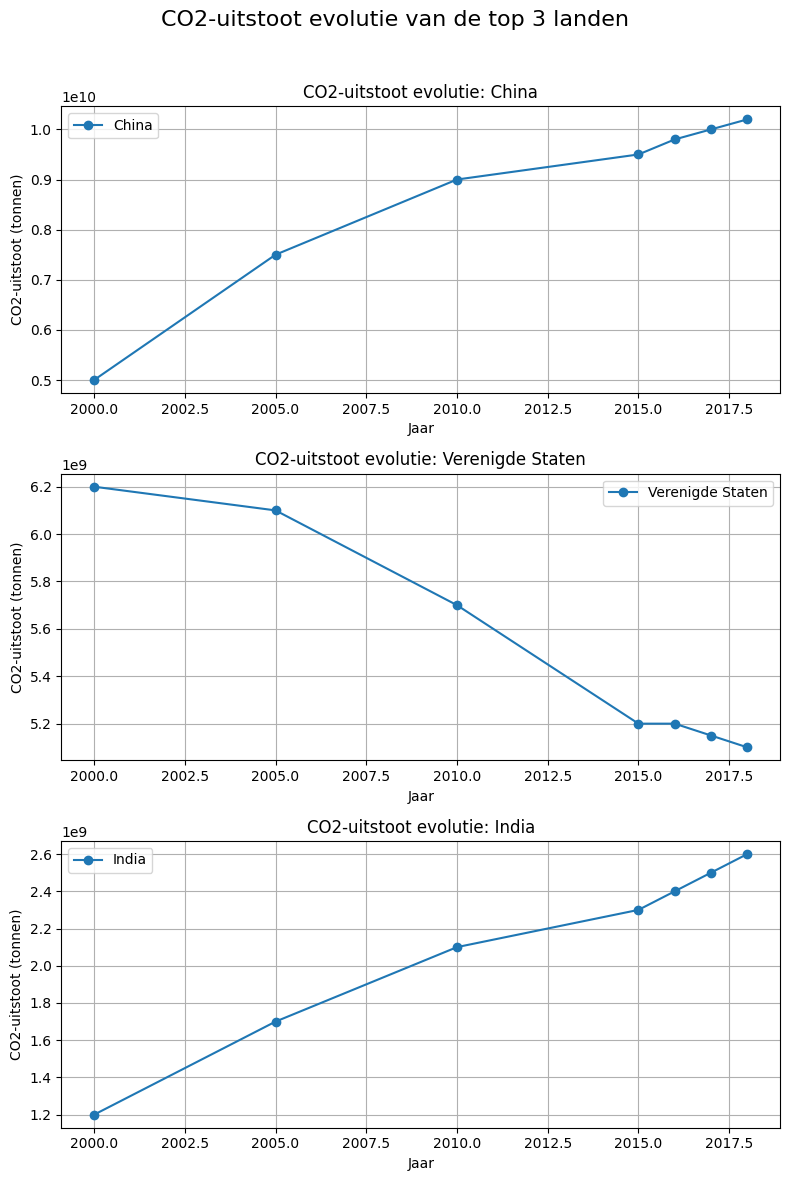

In [120]:
# Selecteer de top 3 landen met de hoogste uitstoot in 2018
df_2018 = csv[csv["Jaar"] == 2018]
top_3_landen = df_2018.nlargest(3, 'CO2-uitstoot (tonnen)')

# Filter de gegevens voor de top 3 landen en plot de uitstoot evolutie door de jaren heen

# We maken 3 aparte subplots (één voor elk land)
fig, axs = plt.subplots(3, figsize=(8, 12)) 

# (optioneel) Geef een algemene titel
fig.suptitle('CO2-uitstoot evolutie van de top 3 landen', fontsize=16)

# Itereren door de top 3 landen met een index nummer (enumerate) om de index van de subplot te bepalen
for idx, land in enumerate(top_3_landen["Land"].unique()):
    # Filter de gegevens voor dit specifieke land
    land_data = csv[csv["Land"] == land]

    # Maak een lijnplot voor de uitstoot door de jaren heen ((optioneel) zet er ook mooie bolletjes in voor de opmaak en een label voor de legenda)
    axs[idx].plot(land_data["Jaar"], land_data["CO2-uitstoot (tonnen)"], marker='o', label=land)

    # Titel voor elk subplot instellen met variabele "land"
    axs[idx].set_title(f"CO2-uitstoot evolutie: {land}")
    axs[idx].set_xlabel("Jaar")
    axs[idx].set_ylabel("CO2-uitstoot (tonnen)") # Let op dat deze label wetenschappelijke notatie gebruikt, dus "1e10" en "1e9"

    # (optioneel) Voeg een grid toe voor beter leesbaarheid
    axs[idx].grid(True)

    # (optioneel) Laat een legende zien (vooral handig wanneer je meerdere lijnen in dezelfde grafiek hebt)
    axs[idx].legend()

# (optioneel) Zorg dat de subplot layout niet overlapt
plt.tight_layout(rect=[0, 0, 1, 0.96])


# Toon de plot
plt.show()


---

#### **Stap 4: Reflectie**

Na het voltooien van de opdracht, denk na over het volgende:
1. Wat waren de grootste verrassingen in de gegevens?
2. Welke data-analyse technieken vond je het nuttigst voor deze dataset?
3. Hoe helpen visualisaties je om inzichten sneller te zien in de data?

---